In [2]:
import subprocess
subprocess.run(['jupyter','nbconvert','--to','python','グリーン関数.ipynb'])

CompletedProcess(args=['jupyter', 'nbconvert', '--to', 'python', 'グリーン関数.ipynb'], returncode=0)

自由なフェルミ粒子のグリーン関数は

\begin{equation}
G(i\omega_n)=\frac{1}{i\omega_n-\epsilon}
\tag{1}
\end{equation}

ただし$\omega_n$は松原振動数

$$\omega_n=\frac{\pi(2n+1)}{\beta}$$

である(nは自然数)  

$G(i\omega_n)$の実部と虚部それぞれを計算してグラフを描くことを試みる（ただし $\epsilon=1$ とする）

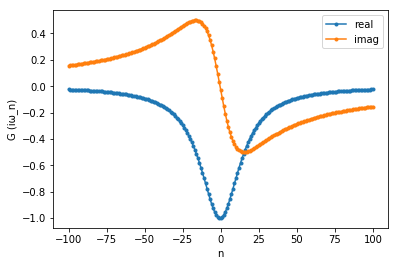

In [65]:
import numpy as np
from matplotlib import pyplot as plt
n_w = np.arange(-100,101)      # グラフに表示するnの範囲を設定
beta = 100                     #βの大きさを設定
w = np.pi*(2*n_w+1)/beta       # 松原周波数ω_nを定義
G_iw = 1/(1j*w-1)              # G(iω_n)を定義
plt.plot(n_w, G_iw.real, label='real', marker='.')
plt.plot(n_w, G_iw.imag, label='imag', marker='.')
plt.xlabel('n')
plt.ylabel('G (iω_n)')
plt.legend()
plt.show()

(1)式のフーリエ級数をとって$\tau$表示のグリーン関数に変換する。

\begin{equation}
G(\tau)=\frac{1}{\beta}\sum_{i=-\infty}^{\infty}G(i\omega_n)e^{-i\omega_n\tau}
\tag{2}
\end{equation}

しかし無限個の和をとることは実際上不可能なので、上でグラフ表示した分のnの範囲だけで和をとる。  
すなわち

$$G(\tau)=\frac{1}{\beta}\sum_{n=-100}^{100}G(i\omega_n)e^{-i\omega_n\tau}$$

を計算してグラフを描くことを試みる

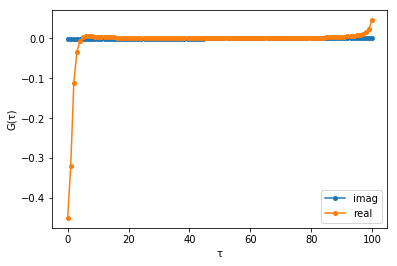

In [81]:
n_tau = 100
tau = np.linspace(0, beta, n_tau)            # τ=0からτ=βまでを100分割した配列tauを作成(プロットの幅の設定)
G_tau = np.empty((n_tau,),dtype=np.complex)  # G(τ)を表す配列を作る。各要素はτの各点に対応。
for t in range(n_tau) :                          
    G_tau[t] = 0                             # G(τ)を初期化
    for n in range(len(n_w)) :                            # 各τの値に対して、フーリエ級数を計算
        G_tau[t] += G_iw[n] * np.exp(-1j*w[n]*t) / beta
plt.plot(tau, G_tau.imag, label='imag', marker='.', ms=8)
plt.plot(tau, G_tau.real, label='real', marker='.', ms=8)
plt.xlabel('τ')
plt.ylabel('G(τ)')
plt.legend()
plt.show()

(2)式の虚部は恒等的にゼロになっており、$G(\tau)$は実関数であることが結果のグラフより分かる。

実は、$G(\tau)$は次のようにして解析的に関数形を求めることができる。  
留数定理より(2)式を
$$\begin{eqnarray}
G(\tau)&=&\frac{1}{\beta}\sum_{n=-\infty}^{\infty}G(i\omega_n)e^{-i\omega_n\tau} \\
&=&\frac{1}{2\pi i}\int_{C}dz\frac{G(z)}{e^{\beta z}+1}e^{-z\tau}
\tag{3}
\end{eqnarray}$$

と、書き換える。
経路Cは阿部龍蔵の「統計力学」9章を参照。  
虚軸まわりの留数でなく、実軸まわりの留数（$z=\epsilon$しかない）をとることで(3)の複素積分を実行すると

$$\begin{eqnarray}
G(\tau)&=&\lim_{z\to\epsilon} (z-\epsilon)\frac{G(z)}{e^{\beta z}+1}e^{-z\tau} \\
&=&\lim_{z\to\epsilon}\frac{1}{e^{\beta z}+1}e^{-z\tau} \\
&=&\frac{e^{-\tau\epsilon}}{e^{\beta\epsilon}+1}
\tag{4}
\end{eqnarray}$$

となる。これが厳密な関数形。  
ちなみに、逆変換

$$G(i\omega_n)=\int_{0}^{\beta}d\tau G(\tau)e^{i\omega_n\tau}$$


により(4)から(1)が得られることが簡単に確かめられる。  
厳密形(4)式を$\epsilon=1$として計算し、近似的に求めたものと比較することを試みる

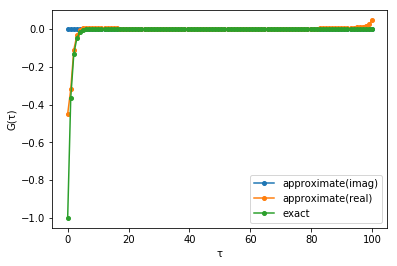

In [80]:
G_tau_ex = -np.exp(-tau)/(np.exp(-beta)+1)           # 添え字exはExactの略。
plt.plot(tau, G_tau.imag, label='approximate(imag)', marker='.', ms=8) 
plt.plot(tau, G_tau.real, label='approximate(real)', marker='.', ms=8) 
plt.plot(tau, G_tau_ex, label='exact', marker='.', ms=8)
plt.xlabel('τ')
plt.ylabel('G(τ)')
plt.legend()
plt.show()

近似的に求めたものは厳密なものに比べてわずかにずれている。（オレンジと緑が微妙に合ってない）  
(1)式は $n\to\infty$ or $n\to-\infty$ の極限で

$$G(i\omega_n)\sim\frac{1}{i\omega_n}\to0$$

であり、フーリエ級数(2)式はnについての和の範囲を広くとるほどこのスピードで収束していく。  
さらに収束性を良くするために

$$\Delta G(i\omega_n)\equiv G(i\omega_n)-\frac{1}{i\omega_n}$$

を定義する。  
定義式の第二項は$G(i\omega_n)$をべき展開した1次の項を打ち消すから  
$n\to\infty$ or $n\to-\infty$ の極限で  

$$\Delta G(\tau)\to(\frac{1}{i\omega_n})^2\to0$$

と、2次の速度で収束する。(さっきは1次だったのでそれより速い。)  
これによりフーリエ級数(2)式を

$$\begin{eqnarray}
G(\tau)&=&\frac{1}{\beta}\sum_{i=-\infty}^{\infty}G(i\omega_n)e^{-i\omega_n\tau} \\
&=&\frac{1}{\beta}\sum_{i=-\infty}^{\infty}(\Delta G(i\omega_n)+\frac{1}{i\omega_n})e^{-i\omega_n\tau} \\
&=&\frac{1}{\beta}\sum_{i=-\infty}^{\infty}\Delta G(i\omega_n)e^{-i\omega_n\tau}-\frac{1}{2}
\end{eqnarray}$$

と、より収束性のよい形に書き直せる。  
さっきと同じ和の範囲（$n=-100\sim100$）で、これを計算してグラフを描いてみる。

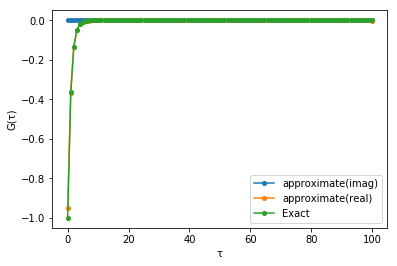

In [82]:
G_tau_new = np.empty((n_tau,),dtype=np.complex)
for t in range(n_tau) :
    G_tau_new[t] = 0
    for n in range(len(n_w)) :
        dG = G_iw[n]- 1/(1j*w[n])                         # ΔG(iω_n)を定義
        G_tau_new[t] += dG * np.exp(-1j*w[n]*t) / beta    # 各τの値に対して、フーリエ級数を計算
G_tau_new = G_tau_new - 1/2                               # G(τ)を-1/2する。
plt.plot(tau, G_tau_new.imag, label='approximate(imag)', marker='.', ms=8)
plt.plot(tau, G_tau_new.real, label='approximate(real)', marker='.', ms=8)
plt.plot(tau, G_tau_ex, label='Exact', marker='.', ms=8)
plt.xlabel('τ')
plt.ylabel('G(τ)')
plt.legend()
plt.show()

nの和の範囲を変えていないのに、前回より一致している。